In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

#### **Pesos**

In [2]:
# Define a semente para reprodutibilidade
np.random.seed(42)

# Criando dois cromossomos com 180 pesos
geracao = np.random.rand(2,180)

# Arredondando para duas casas decimais
geracao = np.round(geracao,2)
geracao

array([[0.37, 0.95, 0.73, 0.6 , 0.16, 0.16, 0.06, 0.87, 0.6 , 0.71, 0.02,
        0.97, 0.83, 0.21, 0.18, 0.18, 0.3 , 0.52, 0.43, 0.29, 0.61, 0.14,
        0.29, 0.37, 0.46, 0.79, 0.2 , 0.51, 0.59, 0.05, 0.61, 0.17, 0.07,
        0.95, 0.97, 0.81, 0.3 , 0.1 , 0.68, 0.44, 0.12, 0.5 , 0.03, 0.91,
        0.26, 0.66, 0.31, 0.52, 0.55, 0.18, 0.97, 0.78, 0.94, 0.89, 0.6 ,
        0.92, 0.09, 0.2 , 0.05, 0.33, 0.39, 0.27, 0.83, 0.36, 0.28, 0.54,
        0.14, 0.8 , 0.07, 0.99, 0.77, 0.2 , 0.01, 0.82, 0.71, 0.73, 0.77,
        0.07, 0.36, 0.12, 0.86, 0.62, 0.33, 0.06, 0.31, 0.33, 0.73, 0.64,
        0.89, 0.47, 0.12, 0.71, 0.76, 0.56, 0.77, 0.49, 0.52, 0.43, 0.03,
        0.11, 0.03, 0.64, 0.31, 0.51, 0.91, 0.25, 0.41, 0.76, 0.23, 0.08,
        0.29, 0.16, 0.93, 0.81, 0.63, 0.87, 0.8 , 0.19, 0.89, 0.54, 0.81,
        0.9 , 0.32, 0.11, 0.23, 0.43, 0.82, 0.86, 0.01, 0.51, 0.42, 0.22,
        0.12, 0.34, 0.94, 0.32, 0.52, 0.7 , 0.36, 0.97, 0.96, 0.25, 0.5 ,
        0.3 , 0.28, 0.04, 0.61, 0.5 , 

#### **Clase Neurônio**

In [ ]:
class Neuronio:
    def __init__(self,array_entrada = None,array_pesos = None):
        self.entrada = array_entrada
        self.pesos = array_pesos
    
    ## Usando sigmóide na função de ativacao
    def ativacao(self,soma):
        return 1 /(1 + np.exp(-soma)),2
    
    def propagation(self):
        # entrada recebendo o valor de entrada para que possa ser alterado
        entrada =  self.entrada.copy()

        # Incluindo um valor 1 no inicío do array da entrada por causa do peso bias
        entrada.insert(0,1)

        soma = 0
        
        # Verifica se os pesos e a entrada tem o mesmo len
        if len(self.pesos) != len(entrada):
            raise ValueError("O número de pesos deve ser igual ao número de entradas, incluindo o bias.")

        # Calculo de soma ponderada a partir do produto escalar entre os vetores de pesos e entrada
        soma = np.dot(entrada, self.pesos)
        
        #     # Obtendo y a partir da função de ativação
        y = self.ativacao(soma)
        return y

    def __str__(self) -> str:
        return "Entrada atual: "+ str(self.entrada) + "\nPesos atuais:" + str(self.pesos)

#### **Classe Rede**

In [ ]:
class Rede:    
    def __init__(self,entrada = None,array_pesos= None):
        self.entrada = entrada
        self.oculta = [None]*9
        self.saida = [None]*9
        self.pesos = array_pesos
        
    # Função para fazer o fatiamento dos pesos
    def slice_pesos(self):
        sliced_pesos = []

        # Para cada linha na lista de pesos percorre a linha adicionando a uma nova lista 10 elementos
        for linha in self.pesos:
            for i in range(0,len(linha),10):
                sliced_pesos.append(linha[i: i + 10])

        return sliced_pesos

    ### SETS
    # Função para setar os pesos
    def set_pesos(self,array_pesos):
        self.pesos = array_pesos
        
    def set_entrada(self,entrada):
        self.entrada = entrada

    # Função para setar a camada oculta
    def set_camada_oculta(self):
        lista_neuronios = []
        
        # Obter os pesos fatiados para cada neurônio da camada oculta
        lista_pesos = self.slice_pesos()
        
        # Configurar cada neurônio na camada oculta com uma fatia de pesos
        for i in range(9):  # Para os 9 neurônios
            neuronio = Neuronio(array_entrada=self.entrada, array_pesos=lista_pesos[i])
            self.oculta[i] = neuronio  # Armazena o neurônio na lista oculta
            y = neuronio.propagation()  # Executa a propagação
            lista_neuronios.append(y)  # Armazena o resultado
            
        self.oculta = lista_neuronios

    # Função para setar a camada de saida
    def set_camada_saida(self):
        lista_neuronios = []
        
        # Obter os pesos fatiados para cada neurônio da camada oculta
        lista_pesos = self.slice_pesos()
        
        # Configurar cada neurônio na camada oculta com uma fatia de pesos
        for i in range(9):  # Para os 9 neurônios
            neuronio = Neuronio(array_entrada=self.get_oculta(), array_pesos=lista_pesos[i])
            self.saida[i] = neuronio  # Armazena o neurônio na camada de saida
            y = neuronio.propagation()  # Executa a propagação
            lista_neuronios.append(y)  # Armazena o resultado
            
        self.saida = lista_neuronios

    def position(self,entrada):
        
        # Set os valores de entrada para a instanciação do neurônio
        self.set_entrada(entrada)
        
        # Setando a camada oculta
        self.set_camada_oculta()
        
        # Setando a camada de saída
        self.set_camada_saida()
        
        # Retornando o index do maior valor do array da camada de saída
        return self.saida.index(max(self.saida))

    ### GETS
    # Função para obter os valores dos pesos
    def get_pesos(self):
        return self.pesos
    
    # Função para obter a camada oculta
    def get_oculta(self):
        return self.oculta
    
    # Função para obter a camada de saida
    def get_saida(self):
        return self.saida
    
    # Print da rede
    def __str__(self) -> str:
        return "Camada oculta: "+ str(self.oculta) + "\nCamada saida:" + str(self.saida) + "\nPesos:" + str(self.pesos)
    

In [ ]:
jogada = [1,0,0,0,-1,0,0,0,0]


rede = Rede(array_pesos=geracao)
print(rede.position(jogada))

8


#### **Funções para classificação de jogadas**

In [6]:
# Função para verificar se as linhas são iguais
def verif_linhas(tabuleiro):
    for i in range(0, 9, 3):
        # Verificando se todos os elementos da linha são iguais exceto zero
        if tabuleiro[i] == tabuleiro[i+1] == tabuleiro[i+2] != 0:
            return str(tabuleiro[i])  # Retornando o valor do ganhador: 1 ou -1
    return False

# Função para verificar se as colunas são iguais
def verif_colunas(tabuleiro):
    for i in range(3):
        # Verificando se todos os elementos da coluna são iguais exceto zero
        if tabuleiro[i] == tabuleiro[i+3] == tabuleiro[i+6] != 0:
            return str(tabuleiro[i])  # Retornando o valor do ganhador: 1 ou -1
    return False

# Função para verificar se a diagonal principal é igual
def verif_diag_principal(tabuleiro):
    # Verificando se todos os elementos da diagonal principal são iguais exceto zero
    if tabuleiro[0] == tabuleiro[4] == tabuleiro[8] != 0:
        return str(tabuleiro[0])  # Retornando o valor do ganhador: 1 ou -1
    return False

# Função para verificar se a diagonal secundária é igual
def verif_diag_secundaria(tabuleiro):
    # Verificando se todos os elementos da diagonal secundária são iguais exceto zero
    if tabuleiro[2] == tabuleiro[4] == tabuleiro[6] != 0:
        return str(tabuleiro[2])  # Retornando o valor do ganhador: 1 ou -1
    return False

def get_vencedor(lista_respostas):
    for valor in lista_respostas:
        # Transormando cada valor em uma string, verifica-se se o valor é numérico (1 ou -1)
        valor = str(valor)
        # if valor.isnumeric():
        #     # Condicional para determinar qual valor retorna
        if valor == "1":
            return "X"
        elif valor == "-1":
            return "O"

def status_jogo(jogada):
    
    # Criando uma lista com os retornos das funções verificadoras de cada jogada, o resultado é um array de 4 elementos. Ex: [1,False,False,False]
    lista_resposta = list([verif_colunas(jogada), verif_linhas(jogada), verif_diag_principal(jogada), verif_diag_secundaria(jogada)])
    # Se algum dos elementos da lista for diferente de false, a função get_vencedor será chamada
    if any(lista_resposta):
        valor = get_vencedor(lista_resposta)
        return valor + " VENCEU!"
    # Condicional para verificar se os únicos valores preenchidos no tabuleiro são 1 e -1
    elif len(np.unique(jogada)) == 2 and 0 not in np.unique(jogada):
        return "EMPATE"
    else:
        return "AINDA TEM JOGO"

#### **Minimax**

import numpy as np
import math

# Define os jogadores
USER = 1    # Jogador (usuário) representado como 1
AI = -1     # Computador representado como -1

class Node:
    def __init__(self, board, player, move=None):
        self.board = board.copy()
        self.player = player
        self.move = move  # A jogada (linha, coluna) que levou a este estado
        self.children = []
        self.score = None

    # Método para expandir o nó, gerando todos os possíveis movimentos
    def expand(self):
        for i in range(3):
            for j in range(3):
                if self.board[i, j] == 0:
                    new_board = self.board.copy()
                    new_board[i, j] = self.player
                    child_node = Node(new_board, -self.player, (i, j))
                    self.children.append(child_node)
                    child_node.expand()

# Função MiniMax usando árvore de estados
def minimax(node, depth, is_maximizing):
    winner = status_jogo(jogada)
    if winner == "O VENCEU!":
        return -10 + depth
    elif winner == "X VENCEU!":
        return 10 - depth
    elif "EMPATE":
        return 0

    # Se não for folha, calcula os scores dos filhos
    if is_maximizing:
        best_score = -math.inf
        for child in node.children:
            score = minimax(child, depth + 1, False)
            best_score = max(score, best_score)
        node.score = best_score
        return best_score
    else:
        best_score = math.inf
        for child in node.children:
            score = minimax(child, depth + 1, True)
            best_score = min(score, best_score)
        node.score = best_score
        return best_score

# Função para encontrar a melhor jogada
def find_best_move(board):
    root = Node(board, AI)  # Cria o nó raiz com a jogada da IA
    root.expand()  # Expande a árvore a partir da raiz

    best_score = math.inf
    best_move = None
    for child in root.children:
        score = minimax(child, 0, True)  # Maximiza a jogada do usuário
        if score < best_score:
            best_score = score
            best_move = child.move

    return best_move

In [ ]:
def check_winner(board):
    # Verifica se há um vencedor em linhas e colunas
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] != 0:
            return board[i][0]
        if board[0][i] == board[1][i] == board[2][i] != 0:
            return board[0][i]
    
    # Verifica se há um vencedor nas diagonais
    if board[0][0] == board[1][1] == board[2][2] != 0:
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] != 0:
        return board[0][2]
    
    return 0

def is_moves_left(board):
    for row in board:
        if 0 in row:
            return True
    return False

def miniMax(board, depth, isMax):
    result = check_winner(board)
    if result == 1:  # Jogador vence
        return 10 - depth
    elif result == -1:  # Computador vence
        return depth - 10
    elif not is_moves_left(board):  # Empate
        return 0
    
    if isMax:  # Jogador (Max)
        maxScore = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == 0:
                    board[i][j] = 1
                    score = miniMax(board, depth + 1, False)
                    board[i][j] = 0
                    maxScore = max(maxScore, score)
        return maxScore
    else:  # Computador (Min)
        minScore = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == 0:
                    board[i][j] = -1
                    score = miniMax(board, depth + 1, True)
                    board[i][j] = 0
                    minScore = min(minScore, score)
        return minScore

def bestMove(board):
    best_val = float('inf')
    best_move = (-1, -1)

    # Considerando todas as possibilidades, encontra a melhor jogada
    for i in range(3):
        for j in range(3):
            if board[i][j] == 0:
                board[i][j] = -1
                move_val = miniMax(board, 0, True)  # True indica que é a vez do jogador
                board[i][j] = 0
                if move_val < best_val:
                    best_move = (i, j)
                    best_val = move_val
    return best_move

#### **Funções para realização de jogadas**

In [137]:
def coleta_jogada():
    # Coletando os valores por meio de um input
    linha, coluna = input("Informe a linha e a coluna onde deseja incluir o x. Ex: [1,2]").split(",")
    
    # Convertendo os valores para inteiro
    return int(linha), int(coluna)

# Função para validação da posição informada para realização da jogada
def valida_jogada(jogada, linha, coluna):
    # Cálculo do índice no array 1x9 a partir da linha e coluna
    indice = (linha - 1) * 3 + (coluna - 1)

    print("Linha:", linha)
    print("Coluna:", coluna)

    # Verificar se o valor na posição especificada é igual a zero
    if jogada[indice] == 0:
        return True
    
    return False
    
# Função para realização da jogada do computador a partir de uma jogada aleatória
def jogada_Aleatoria(jogada):
    jogada_feita = False
    
    for i in range(3):
        for j in range(3):
            if jogada[i, j] == 0:
                jogada[i, j] = -1
                jogada_feita = True
                break
        if jogada_feita:
            break
        
    return jogada

# Função para utilização do Minimax para realização da jogada
def jogada_Minimax(jogada):
    # Usando Minimax para obter a melhor posição para realização da jogada
    posicao = bestMove(jogada)
    
    # Realização da jogada no tabuleiro
    jogada[posicao[0],posicao[1]] = -1
    
    return jogada


# Função para ajuste de jogadas
def ajuste_jogada(jogada, linha, coluna):
    # Cálculo do índice no array 1x9 a partir de linha e coluna
    indice = (linha - 1) * 3 + (coluna - 1)

    # Substituindo o valor da posição informada por 1
    jogada[indice] = 1

    return jogada

# Função para definir a dificuldade da partida
def set_dificuldade():
    valor_valido = False
    while not valor_valido: 
        dificuldade = input("Escolha o nível de dificuldade: [1]: FÁCIL\n[2]: MÉDIO\n[3]: DIFÍCIL")
        
        if not dificuldade.isnumeric():
            print("Valor precisa ser numérico!")
            continue
        
        if int(dificuldade) not in range(1,4):
            print("O valor deve ser 1, 2 ou 3")
            continue
        
        valor_valido = True
        break
        
    return int(dificuldade)

# Função para definir o acesso ao minimax 
def jogada_COM(jogada,dificuldade,jogou):
    ###
    # Dificuldade do jogo 
    # [1]: FÁCIL
    # [2]: MÉDIO
    # [3]: DIFÍCIL
    # 
    
    ifJogou = False
    
    # Caso seja fácil, se o valor aleatório for menor que 25% acessa o minimax
    if dificuldade == 1:
        if jogou == 4:
            jogada = jogada_Minimax(jogada)
            jogou = 0
            ifJogou = True
        else:
            jogada = jogada_Aleatoria(jogada)
    
    # Caso seja médio, se o valor aleatório for menor que 50% acessa o minimax
    elif dificuldade == 2:
        if jogou % 2 == 0:
            jogada = jogada_Minimax(jogada)
            ifJogou = True
        else:
            jogada = jogada_Aleatoria(jogada)
        
        if jogou == 4:
            jogou = 0
        
    
    # Caso seja difícil, sempre acessa o minimax
    elif dificuldade == 3:
        jogada = jogada_Minimax(jogada)
        ifJogou = True
        
    jogou+=1
    
    print(jogada)
    return jogada, ifJogou


### **Função para plotagem do tabuleiro**

In [ ]:
import matplotlib.pyplot as plt

def plot_board(board,status=None,ifJogou=False):

    board = np.array(board).reshape(3, 3)

    
    fig, ax = plt.subplots()
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.text(-0.25, 2.5, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 1.5, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 0.5, '3', fontsize=42, ha='center', va='center', color='black')

    ax.text(0.5, 3.25, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(1.5, 3.25, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(2.5, 3.25, '3', fontsize=42, ha='center', va='center', color='black')

    plt.plot([1, 1], [0, 3], color='black', linewidth=2)
    plt.plot([2, 2], [0, 3], color='black', linewidth=2)
    plt.plot([0, 3], [1, 1], color='black', linewidth=2)
    plt.plot([0, 3], [2, 2], color='black', linewidth=2)

    for i in range(3):
        for j in range(3):
            mark = board[i][j]
            if mark == 1:
                plt.text(j + 0.5, 2.5 - i, 'X', fontsize=42, ha='center', va='center', color='black')
            elif mark == -1:
                plt.text(j + 0.5, 2.5 - i, 'O', fontsize=42, ha='center', va='center', color='black')

    if status is not None:
        plt.text(1.5, -0.5, 'Status: ' + status, fontsize=42, ha='center', va='center', color='black')
    
    if ifJogou == True:
        plt.text(1.5, -1.25, 'MiniMax Jogou', fontsize=42, ha='center', va='center', color='black')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    plt.show()


In [ ]:
# jogada = [1,-1,0,0,1,0,0,-1,1]

# # status_jogo(jogada)
# jogada_realizada = False
# while not jogada_realizada:
#     linha,coluna = coleta_jogada()
    
#     # Chamando a função de validação de jogada
#     if valida_jogada(jogada,linha,coluna):
#         # Realizando o ajuste da jogada a partir das posições de inserção informadas
#         jogada = ajuste_jogada(jogada,linha,coluna)
#         print('Jogada realizada!')
#         jogada_realizada = True
#     else:
#         print("Jogada não realizada")
#         continue # Recomeça solicitando a jogada para o usuário

### **Realização da partida**

Linha: 2
Coluna: 3
Posição já ocupada!


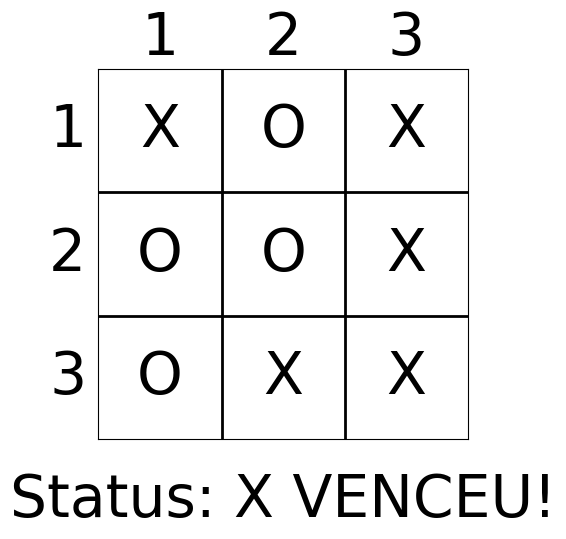

In [139]:
from IPython.display import clear_output

# Convertendo a lista de jogadas em um array 3x3
jogada = [0,0,0,0,0,0,0,0,0]
jogou = random.randint(1, 4)
plot_board(jogada)

finalizar_jogo = False

dificuldade = set_dificuldade()

while not finalizar_jogo:
    clear_output(wait=True)
    # Coletando a jogada
    linha,coluna = coleta_jogada()
    
    # Chamando a função de validação de jogada
    if valida_jogada(jogada,linha,coluna):
        # Realizando o ajuste da jogada a partir das posições de inserção informadas
        jogada = ajuste_jogada(jogada,linha,coluna)
        print('Posição já ocupada!')
    else:
        print("Jogada não realizada")
        continue # Recomeça solicitando a jogada para o usuário
    
    # Redefinindo o shape do array 2d para usar no classificador
    jogada = np.array(jogada).reshape(9,)

    # Obtenção do status do jogo após jogada do usuário
    status  = status_jogo(jogada)
    
    # Caso haja um vencedor o loop será encerrado
    if status_jogo(jogada) != "AINDA TEM JOGO":
        finalizar_jogo = True
        plot_board(jogada,status)
        break
    
    jogada = np.array(jogada).reshape(3,3)

    # Realização de jogada da máquina
    jogada, ifJogou = jogada_COM(jogada,dificuldade,jogou)
    jogou += 1

    # Redefinindo o shape do array para usar no classificador
    jogada = jogada.reshape(9,)

    # Obtenção do status do jogo após jogada da máquina
    status  = status_jogo(jogada)

    # Plotando o tabuleiro 
    plot_board(jogada,status,ifJogou)
    
    # Caso haja um vencedor o loop será encerrado
    if status_jogo(jogada) != "AINDA TEM JOGO":
        finalizar_jogo = True

